<center>
    <h1 id='data-visualization-principles' style='color:#7159c1'>📊 Data Visualization - Principles 📊</h1>
    <i>Good-Practices to boost your Data Visualizations</i>
</center>

```txt
- Avoid Pie and Donut Plots - Use Bar Plots Instead
- Avoid Using 3D Plots
- Use Beautiful, Match Color Palettes
- Sort Datas on Bar Plot
- Bar Plots View: Vertically or Horizontally?
- Data Scales and Transformations
- Plots Comparisons - Axes
- Significant Digits in Continuous Features
```

In [1]:
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn

np.random.seed(3082023)
sns.set_style('whitegrid')

<p id='0-avoid-pie-and-donut-plots-use-bar-plots-instead' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Avoid Pie and Donut Plots - Use Bar Plots Instead</p>

Never, never, never use Pie and Donut Plots, they are hard to visualize and to understand, especially when there a bunch of slices. Bar Plots are great alternatives to them, regardless the amoung of slices/bars.

In [2]:
# ---- Fake Dataset ----
#
# - names: string
# - values: random integer from 0 to 100
#
names = ['Brazil', 'Canada', 'Italy', 'Japan', 'USA']
values1 = [np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)]
values2 = [np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)]
values3 = [np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)]

countries_df = pd.DataFrame([names, values1, values2, values3])
countries_df.set_index(pd.Index(['Country', 'Value_1', 'Value_2', 'Value_3']), inplace=True)
countries_df = countries_df.T # transpose
countries_df

,Country,Value_1,Value_2,Value_3
0,Brazil,69,76,57
1,Canada,74,25,86
2,Italy,60,45,74
3,Japan,23,34,0
4,USA,90,44,25


In [3]:
# ---- Fake Dataset 2 ----
#
# - names: string
# - values: random integer from 0 to 100
#
another_names = ['Brazil', 'Canada', 'Italy', 'Japan', 'USA', 'China', 'Argentina', 'France', 'German', 'UK']
another_values1 = [np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)]
another_values2 = [np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)]
another_values3 = [np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)]

another_countries_df = pd.DataFrame([another_names, another_values1, another_values2, another_values3])
another_countries_df.set_index(pd.Index(['Country', 'Value_1', 'Value_2', 'Value_3']), inplace=True)
another_countries_df = another_countries_df.T # transpose
another_countries_df

,Country,Value_1,Value_2,Value_3
0,Brazil,52,0,3
1,Canada,35,4,33
2,Italy,65,1,18
3,Japan,67,50,33
4,USA,9,77,21
5,China,94,37,32
6,Argentina,59,98,7
7,France,20,76,64
8,German,88,76,14
9,UK,37,99,85


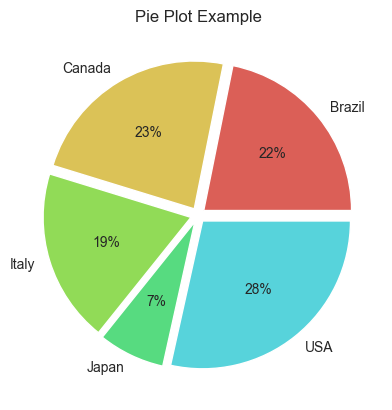

In [4]:
# ---- Pie Plot ----
#
# I put the values in percentage here to facilitate the understanding,
# but try to see the difference in size between each slice without
# seeing the percentage, you will feel this kind of a tough task.
#
# Parameters:
#  - explode >> distance between each slice
#  - autopct >> puts the values in percentage
#
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
color_palette = sns.color_palette('hls', 8)

plt.pie(
    countries_df['Value_1']
    , labels=countries_df['Country']
    , autopct='%.0f%%'
    , explode=explode
    , colors=color_palette
)

plt.title('Pie Plot Example')
plt.show()

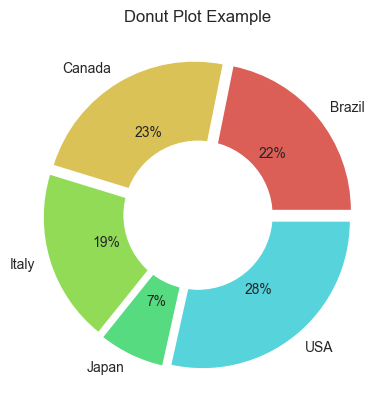

In [5]:
# ---- Donut Plot ----
#
# Donut Plots contain the same problem present on Pie Plots
#
plt.pie(
    countries_df['Value_1']
    , labels=countries_df['Country']
    , autopct='%.0f%%'
    , explode=explode
    , colors=color_palette
)

# Parameters
#    - position: (0, 0) > center
#    - 0.50: radius
#    - fc: color
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()


fig.gca().add_artist(center_circle) # Adding circle on Pie Plot

plt.title('Donut Plot Example')
plt.show()

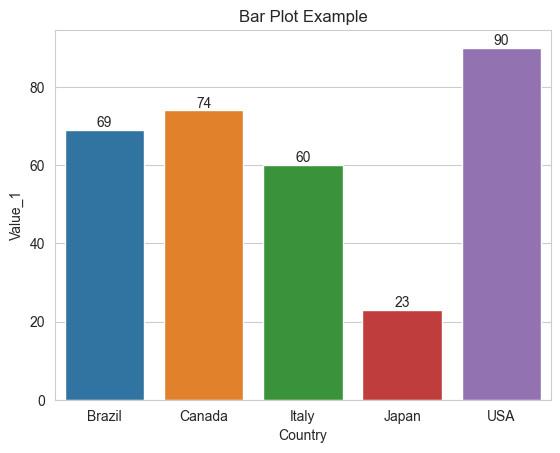

In [6]:
# ---- Bar Plot ----
#
# Now see the facility to visualize the datas when we use Bar Plots
# instead.
#
axis = sns.barplot(data=countries_df, x='Country', y='Value_1')

# Adding the values as text above the bars
for index in axis.containers: axis.bar_label(index, )

plt.title('Bar Plot Example')
plt.show()

<p id='1-avoid-using-3d-plots' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Avoid Using 3D Plots</p>

Like Pie and Donuts Plots, 3D plots are hard AF to be understood - my bad to the swear 😐. It happens because the human brain is used to see 2D images on the screen so, when we stuumble upon with a 3D image, it is weird and hard to understand at a first glance.

The unique exception is when you are at the cinema and you are watching a 3D movie with the properly glasses... But try to watch without the glasses, and you will face problems to watch!

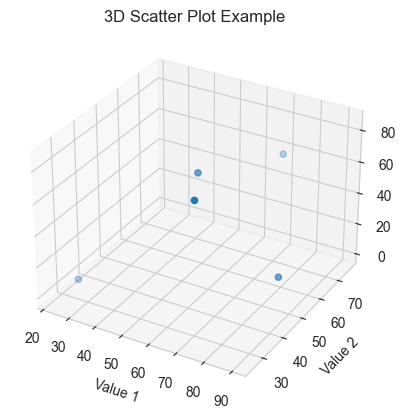

In [7]:
# ---- 3D Scatter Plot ----
#
# Exercise: try to tell what points have the higher Value 1, Value 2
# and Value 3 just looking at the plot. You will probably take some time
# trying to figure it out.
#
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d') # 111 > row 1, column 1 and deep 1 (just one plot)

axis.set_xlabel('Value 1')
axis.set_ylabel('Value 2')
axis.set_zlabel('Value 3')

axis.scatter(
    xs=countries_df['Value_1']
    , ys=countries_df['Value_2']
    , zs=countries_df['Value_3']
)

plt.title('3D Scatter Plot Example')
plt.show()

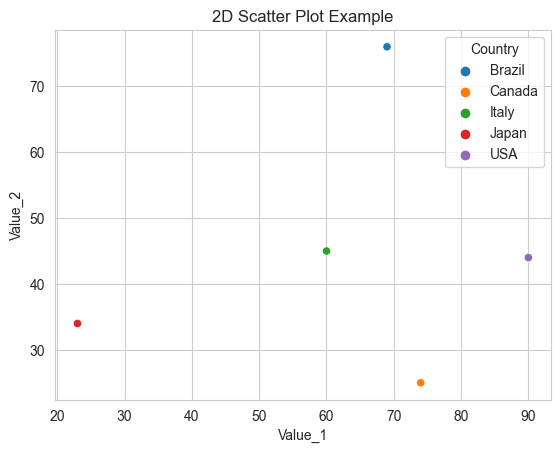

In [8]:
# ---- 2D Scatter Plot ----
#
# Now take the same exercise to a 2D plot
#
# In this one, it is shown only Value 1 by Value 2, but you can
# make other combinations altering this cell
#
sns.scatterplot(
    data=countries_df
    , x='Value_1'
    , y='Value_2'
    , hue='Country'
    , color=color_palette
)

plt.title('2D Scatter Plot Example')
plt.show()

<p id='2-use-beautiful-match-color-palettes' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>2 | Use Beautiful, Match Color Palettes</p>

At the same time colors draw attention, they can drive away attention. If you use a palette with similar colors, probably the viewers will face some problems in order to assimilate the legend and the colors.

Another point is that if the viewers are colorblind, consider using colors that are distinguishisd by them.

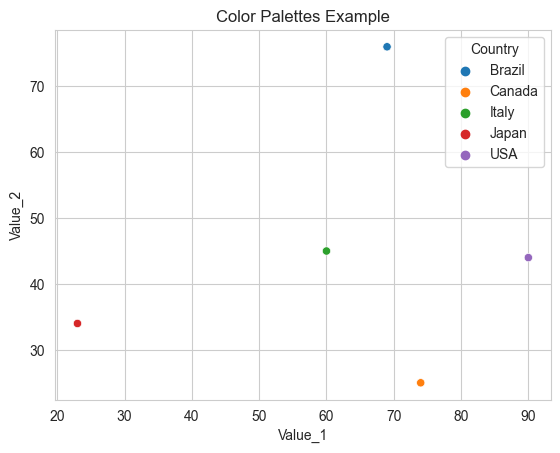

In [9]:
# ---- Color Palettes ----
#
# In order to make the color palette choice easier, Seaborn provides
# a variaty of color palettes. Nowadays, I am using the 'hls - 8'.
#
# Just for curiosity, HSL stands for 'Hue, Saturation and Lightness'.
#
sns.scatterplot(
    data=countries_df
    , x='Value_1'
    , y='Value_2'
    , hue='Country'
    , color=color_palette
)

plt.title('Color Palettes Example')
plt.show()

<p id='3-sort-datas-on-barplot' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>3 | Sort Datas on Barplot</p>

Well, we already know that Bar Plots are better and easier to visualize than Pie and Donut Plots, but there are situations that even Bar Plots get hard to understand.

So here is the hint: Sort the datas!! Sorted Bars have logic to the view, regardless the sort being in ascending or descending order.

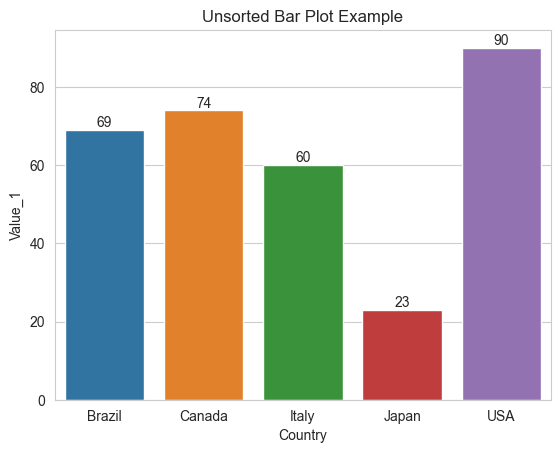

In [10]:
# ---- Unsorted Bar Plot ----
#
# - let's first see an unsorted bar plot
#
axis = sns.barplot(data=countries_df, x='Country', y='Value_1')
for index in axis.containers: axis.bar_label(index, )
plt.title('Unsorted Bar Plot Example')
plt.show()

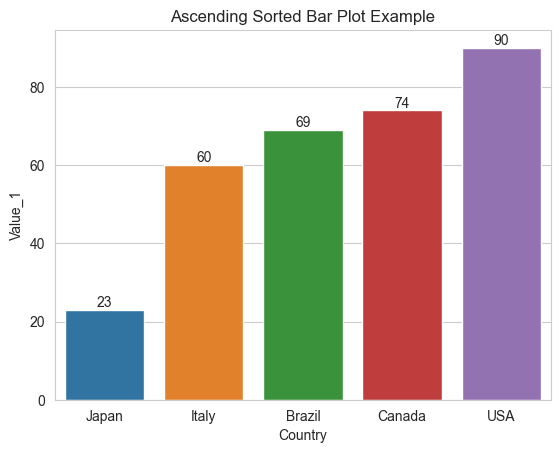

In [11]:
# ---- Ascending Sorted Bar Plot ----
#
# - okay, you can understand the previous one, but now let's take
# a view to a sorted one in ascending order
#
axis = sns.barplot(
    data=countries_df
    , x='Country'
    , y='Value_1'
    , order=countries_df.sort_values('Value_1', ascending=True).Country
)

for index in axis.containers: axis.bar_label(index, )
plt.title('Ascending Sorted Bar Plot Example')
plt.show()

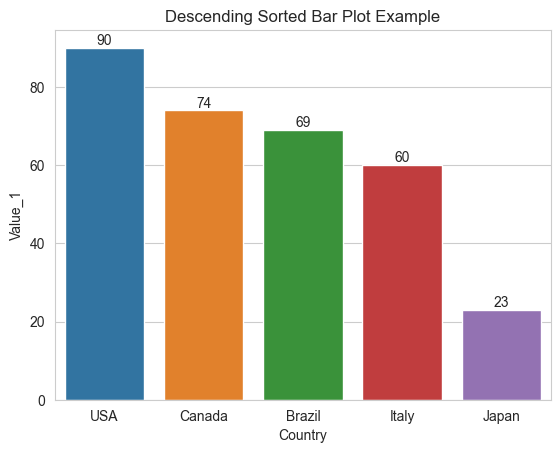

In [12]:
# ---- Descending Sorted Bar Plot ----
#
# - and here's the Descending Sorted One!
#
axis = sns.barplot(
    data=countries_df
    , x='Country'
    , y='Value_1'
    , order=countries_df.sort_values('Value_1', ascending=False).Country
)

for index in axis.containers: axis.bar_label(index, )
plt.title('Descending Sorted Bar Plot Example')
plt.show()

<p id='4-bar-plots-view-horizontally-or-vertically' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>4 | Bar Plots View: Horizontally or Vertically</p>

Another hint to boost your Bar Plots Visualizations is displaying it in horizontal and vertical way.

When your plot contains a few bars, there is no problem displaying it `vertically`; in the other hand, when your plot contains many bars, it is better considering to display it `horizontally`.

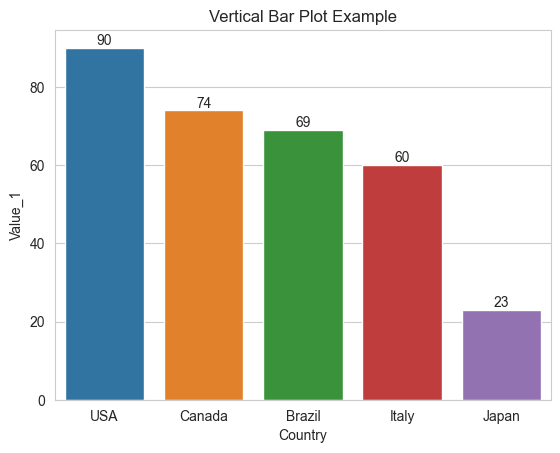

In [13]:
# ---- Vertical Bar Plot ----
#
# - better when the plot contains a few bars
#
axis = sns.barplot(
    data=countries_df
    , x='Country'
    , y='Value_1'
    , order=countries_df.sort_values('Value_1', ascending=False).Country
)

for index in axis.containers: axis.bar_label(index, )
plt.title('Vertical Bar Plot Example')
plt.show()

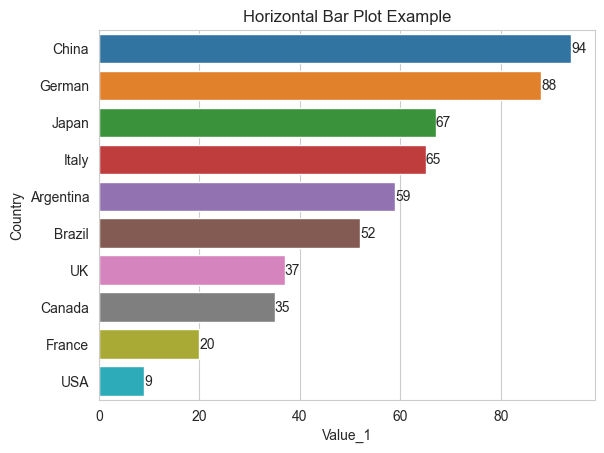

In [14]:
# ---- Horizontal Bar Plot ----
#
# - better when the plot contains many bars
# - one thing is that horizontal bar plots need to have the numerical
# feature assigned to the x-axis and the labels to the y-axis
#
axis = sns.barplot(
    data=another_countries_df
    , y='Country'
    , x='Value_1'
    , order=another_countries_df.sort_values('Value_1', ascending=False).Country
    , orient='h'
)

for index in axis.containers: axis.bar_label(index, )
plt.title('Horizontal Bar Plot Example')
plt.show()

<p id='5-data-scales-and-transformations' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>5 | Data Scales and Transformations</p>

If you are new or not from Data Science area, this hint will probably be hard to stick into your mind, but do not worry, I will make the explanation simplier.

Consider the we have a list containing ages of people. Our list looks like this:

```python
ages = [5, 7, 4, 8, 50]
```

As you can see, we have ages smaller than 10, except the last one - 50. Looking at this, we can tell that the variance of the ages is huge, because the difference between 5 and 7 is just two, but the difference between 5 and 50 is forty-five, quite a big one, isn't it?

If we plot the ages into a scatter plot with another variable, we will find a big gap between the points with age smaller than 10 and the point of 50, making the view harder.

Also, when we are modeling Machine Learning Models, we must take in consideration that these Algorithms do not work well with big numerica values, so scaling the numeric features is always a good practice to get better results.

So, if there are no problems to visualize transformed and scaled datas, we can apply math functions to transform our ages, like making them be into a range from 0 and 1.

There are several techniques to do it, like `Min Max Scaler`, `Log`, `Square Root`, `Robust Scaler`, `Normalization` and `Standard Scaler`. In this tutorial, we will be using the first one: `Min Max Scaler`, making the values be between the range 0 and 1.

> Min Max Scaler Equation:

$$
X_{\text{new}} = \frac{X_{\text{old}} - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

- where _x_ is the dataframe column feature.

In [15]:
# ---- Min Max Scaler Function ----
def min_max_scaler(df, feature_name):
    """
    Returns the Min Max Scaler value of a Pandas DataFrame feature.
    
    Parameters:
        - df: Pandas DataFrame
        - feature_name: String (must be a valid DataFrame column name)
    """
    min_value = min(df[feature_name])
    max_value = max(df[feature_name])
    return ((df[feature_name] - min_value) / (max_value - min_value))

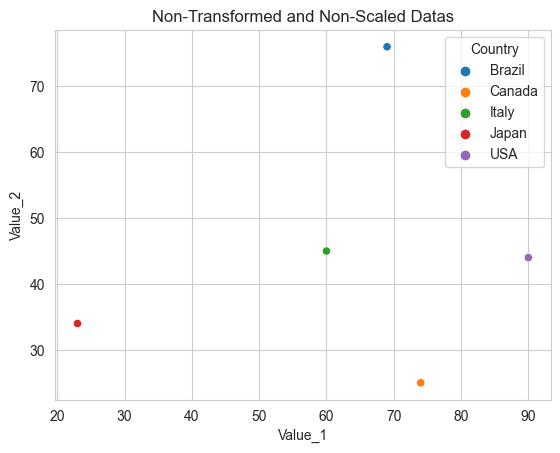

In [16]:
# ---- Non-Transformed and Non-Scaled Datas ----
#
# - realize the distance between the points and their values
# in both x and y-axis.
#
sns.scatterplot(
    data=countries_df
    , x='Value_1'
    , y='Value_2'
    , hue='Country'
    , color=color_palette
)

plt.title('Non-Transformed and Non-Scaled Datas')
plt.show()

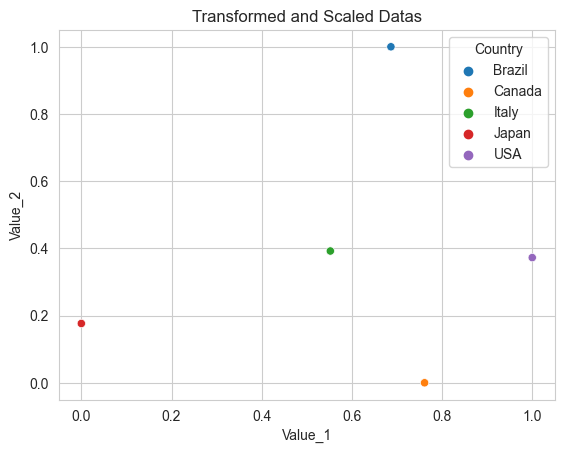

In [17]:
# ---- Transformed and Scaled Datas ----
#
# - realize the distance between the points and their values
# in both x and y-axis.
#
temp_countries_df = countries_df.copy()
temp_countries_df['Value_1'] = min_max_scaler(temp_countries_df, 'Value_1')
temp_countries_df['Value_2'] = min_max_scaler(temp_countries_df, 'Value_2')


sns.scatterplot(
    data=temp_countries_df
    , x='Value_1'
    , y='Value_2'
    , hue='Country'
    , color=color_palette
)

plt.title('Transformed and Scaled Datas')
plt.show()

<p id='6-plots-comparisons-axes' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>6 | Plots Comparisons - Axes</p>

When we are comparing two plots of the same type, I mean two bar plots or two scatter plots for instance, it is a good practice to put them together side-by-side or one above another.

When we are comparing differences between the `x-axis` of both plots, it is good to plot them `one above another`; in the other hand, when we are comparing differences between the `y-axis` of both plots, it is good to plot them `side-by-side`. And, when we are comparing `both axis`, we first find what axis have the major difference and follow its rule.

> **Comparing X-Axis** - `one above another`;

> **Comparing Y-Axis** - `side-by-side`;

> **Comparing Both Axis** - `use the rule of the axis with the major difference. For instance, if the x-axis has the major difference, then we plot one above another, else, we plot side-by-side`.

Also, another good practice rule is always use the `same x and y-axis range` for both plots. So if one plot goes from 0 to 10 in x-axis and the other one goes from 5 to 20, both plots must have a x-axis from 0 to 20!!

In [44]:
# ---- X-Axis Comparison: Creating Fake Dataset ----
x_1 = [2, 3, 4, 5, 6]
y_1 = [1, 2, 3, 4, 5]
x_2 = [5, 6, 8, 10, 12]
y_2 = [1, 2, 3, 4, 5]

min_x_range = min(x_1 + x_2) - 2
max_x_range = max(x_1 + x_2) + 2

x_axis_comparison_df = pd.DataFrame([x_1, y_1])
x_axis_comparison_df.set_index(pd.Index(['x', 'y']), inplace=True)
x_axis_comparison_df = x_axis_comparison_df.T

another_x_axis_comparison_df = pd.DataFrame([x_2, y_2])
another_x_axis_comparison_df.set_index(pd.Index(['x', 'y']), inplace=True)
another_x_axis_comparison_df = another_x_axis_comparison_df.T

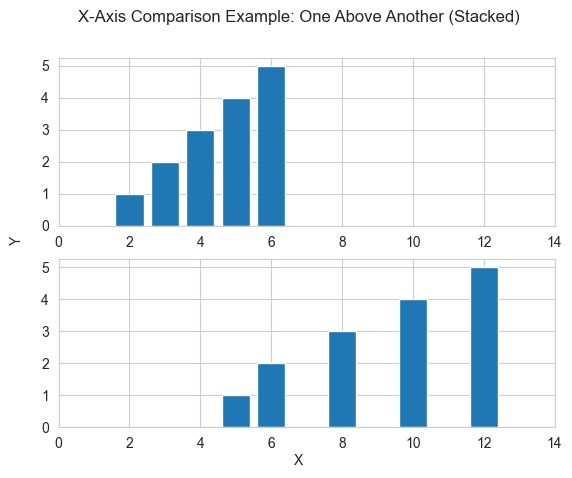

In [65]:
# ---- X-Axis Comparison: Plotting ----
#
# - one above another (stacked)
# - set_xlim: function used to set a custom x-axis range
#
figure, axes = plt.subplots(2) # two rows and one column

axes[0].bar(data=x_axis_comparison_df, x='x', height='y')
axes[0].set_xlim(min_x_range, max_x_range)

axes[1].bar(data=another_x_axis_comparison_df, x='x', height='y')
axes[1].set_xlim(min_x_range, max_x_range)

figure.suptitle('X-Axis Comparison Example: One Above Another (Stacked)')
figure.text(0.5, 0.04, 'X', ha='center', va='center', rotation='horizontal')
figure.text(0.06, 0.5, 'Y', ha='center', va='center', rotation='vertical')

plt.show()

In [47]:
# ---- Y-Axis Comparison: Creating Fake Dataset ----
x_3 = [1, 2, 3, 4, 5]
y_3 = [2, 3, 4, 5, 6]
x_4 = [1, 2, 3, 4, 5]
y_4 = [5, 6, 8, 10, 12]

min_y_range = min(y_3 + y_4) - 2
max_y_range = max(y_3 + y_4) + 2

y_axis_comparison_df = pd.DataFrame([x_3, y_3])
y_axis_comparison_df.set_index(pd.Index(['x', 'y']), inplace=True)
y_axis_comparison_df = y_axis_comparison_df.T

another_y_axis_comparison_df = pd.DataFrame([x_4, y_4])
another_y_axis_comparison_df.set_index(pd.Index(['x', 'y']), inplace=True)
another_y_axis_comparison_df = another_y_axis_comparison_df.T

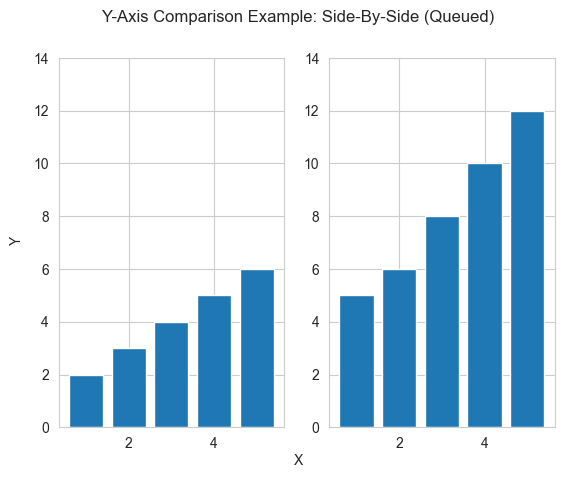

In [66]:
# ---- Y-Axis Comparison: Plotting ----
#
# - side-by-side (Queued)
# - set_ylim: function used to set a custom y-axis range
#
figure, axes = plt.subplots(1, 2) # one row and two columns

axes[0].bar(data=y_axis_comparison_df, x='x', height='y')
axes[0].set_ylim(min_y_range, max_y_range)

axes[1].bar(data=another_y_axis_comparison_df, x='x', height='y')
axes[1].set_ylim(min_y_range, max_y_range)

figure.suptitle('Y-Axis Comparison Example: Side-By-Side (Queued)')
figure.text(0.5, 0.04, 'X', ha='center', va='center', rotation='horizontal')
figure.text(0.06, 0.5, 'Y', ha='center', va='center', rotation='vertical')

plt.show()

<p id='7-significant-digits-in-continuous-features' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>7 | Significant Digits in Continuous Features</p>

When we are assigning inputs to Machine and Deep Learning Models, there are no problems if the continuous features contain many float digits, however, when showing these numbers to humans, the human brain finds difficult comparing two numbers with large float digits.

So, in order to make easier the visualization only, it is a good practice to consider only `three or four significant digits` when displaying it to humans.

Logic wise, you can trucante, round, floor or ceil the numbers. Let's see a practical example.

In [71]:
# ---- Significant Digits ----
#
# - dataframe without rounded numbers
#
x = np.random.random(size=(7))
y = np.random.random(size=(7))

significant_digits_df = pd.DataFrame([x, y])
significant_digits_df.set_index(pd.Index(['x', 'y']), inplace=True)
significant_digits_df = significant_digits_df.T

,x,y
0,0.836903,0.125712
1,0.941612,0.360440
2,0.436661,0.586360
3,0.813507,0.450853
4,0.246261,0.074608
5,0.934467,0.617827
6,0.364142,0.841546


In [74]:
# ---- Significant Digits ----
#
# - dataframe with rounded numbers (three significant digits)
# - realize how easier is to read numbers with less float digits
#
significant_digits_df['rounded_x'] = round(significant_digits_df['x'], 3)
significant_digits_df['rounded_y'] = round(significant_digits_df['y'], 3)
significant_digits_df[['rounded_x', 'rounded_y']]

,rounded_x,rounded_y
0,0.837,0.126
1,0.942,0.360
2,0.437,0.586
3,0.814,0.451
4,0.246,0.075
5,0.934,0.618
6,0.364,0.842


<p id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</p>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).